In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_validate,KFold
import warnings 
warnings.filterwarnings("ignore")
import xgboost as xgb
import lightgbm as lgb

In [2]:
## Reading the dataset

In [3]:
df_train=pd.read_csv("Titanic_train.csv")
df_test=pd.read_csv("Titanic_test.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
## Performing EDA in training dataset

In [6]:
df_train.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
mode1=df_train["Cabin"].mode()
mode1

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [9]:
mode2=df_train["Embarked"].mode()
mode2

0    S
Name: Embarked, dtype: object

In [10]:
mean=df_train["Age"].mean().round()
mean

30.0

In [11]:
df_train.fillna({"Age":mean,"Cabin":mode1[2],"Embarked":mode2[0]},inplace=True)

In [12]:
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [13]:
df_train.duplicated().any()

False

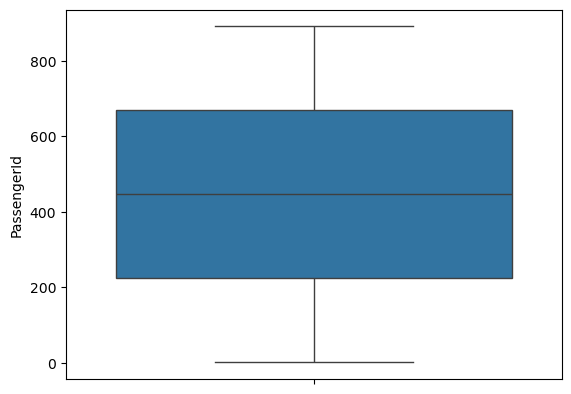

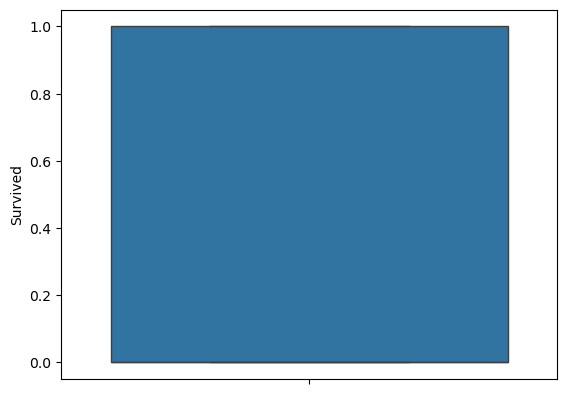

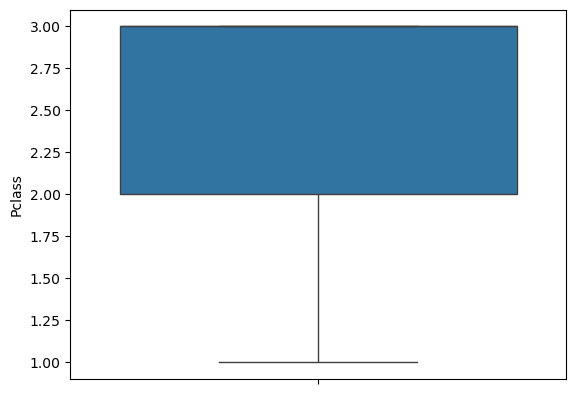

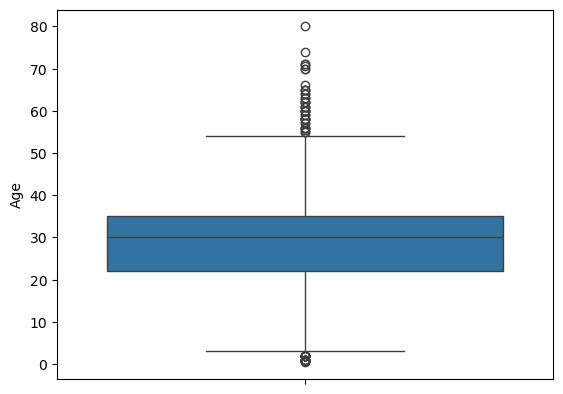

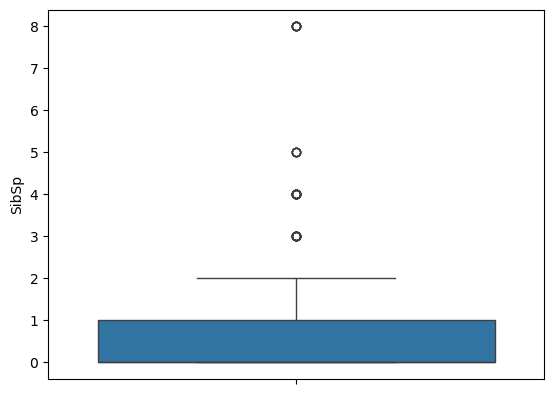

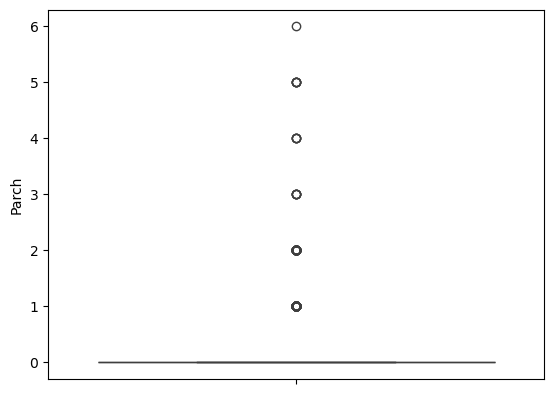

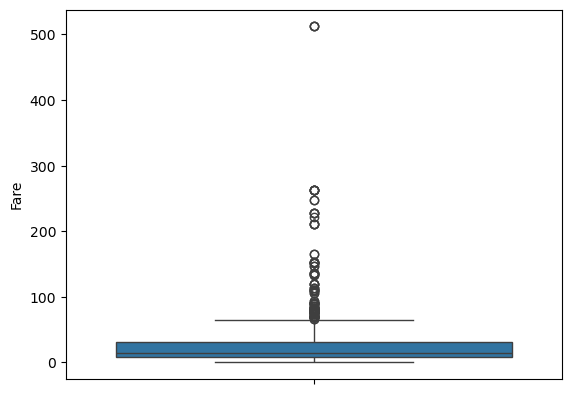

In [14]:
for i in df_train._get_numeric_data():
    sns.boxplot(y=df_train[i])
    plt.ylabel(i)     
    plt.show()

In [15]:
Q1 = df_train.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df_train.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_train.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df_train.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum()) 

Number of outliers in each column:
 PassengerId      0
Survived         0
Pclass           0
Age             66
SibSp           46
Parch          213
Fare           116
dtype: int64


In [16]:
df_train_cleaned = df_train.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df_train_cleaned.reset_index(inplace=True)
df_train_cleaned

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
3,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
4,5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,G6,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,G6,S
573,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,S
574,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
575,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


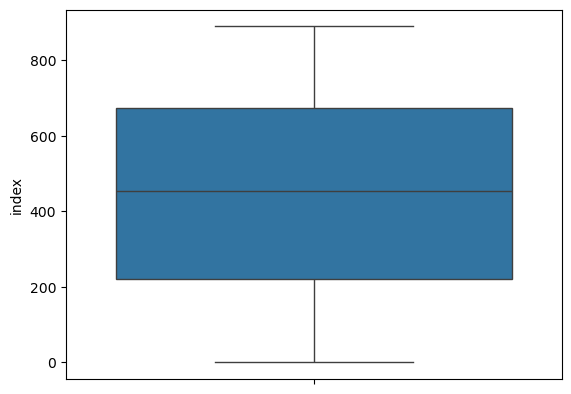

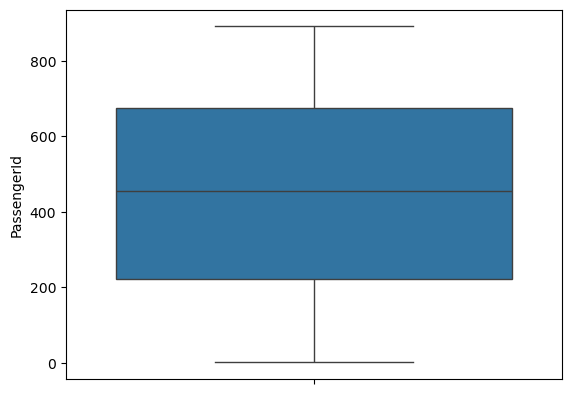

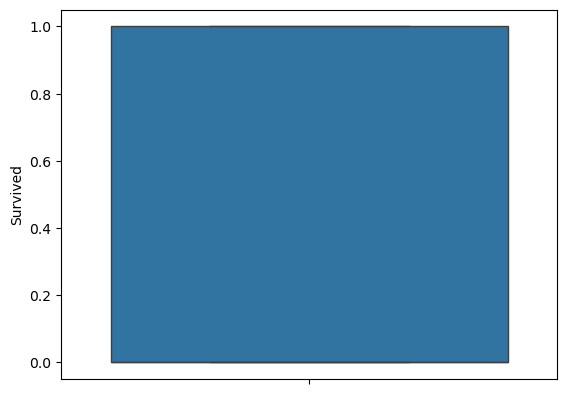

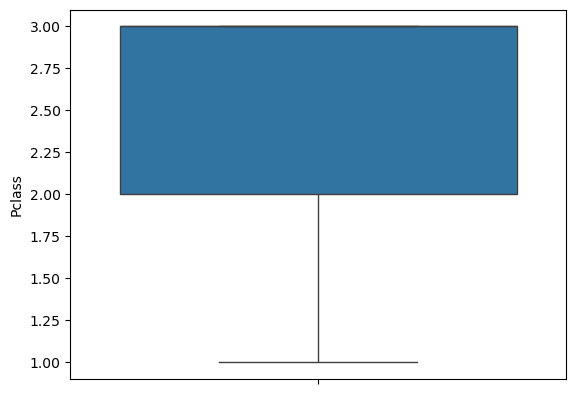

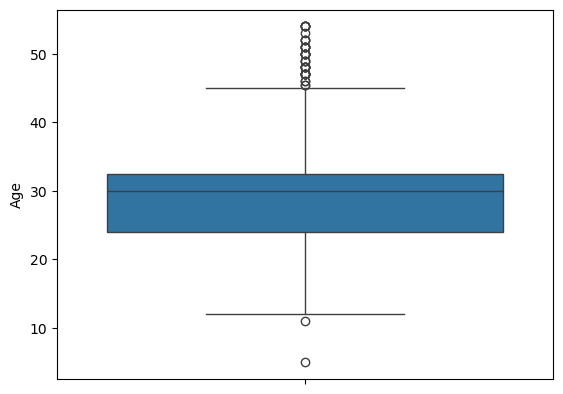

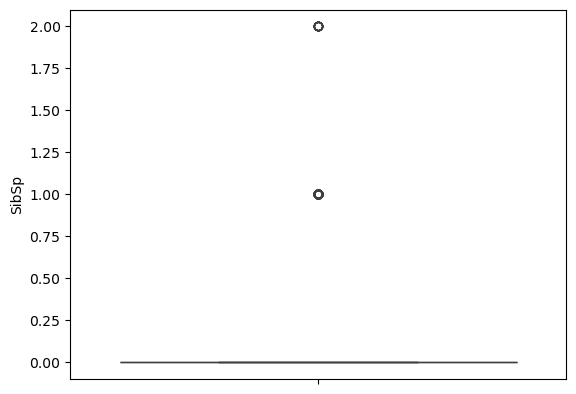

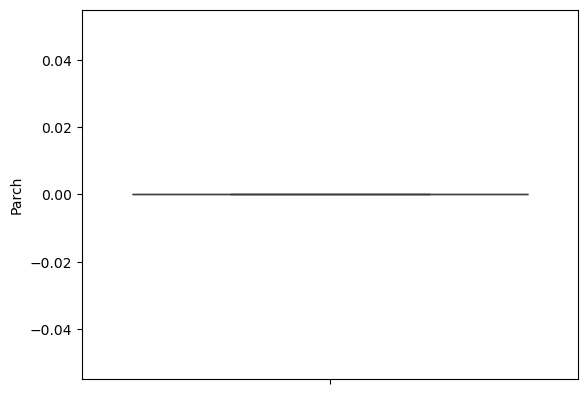

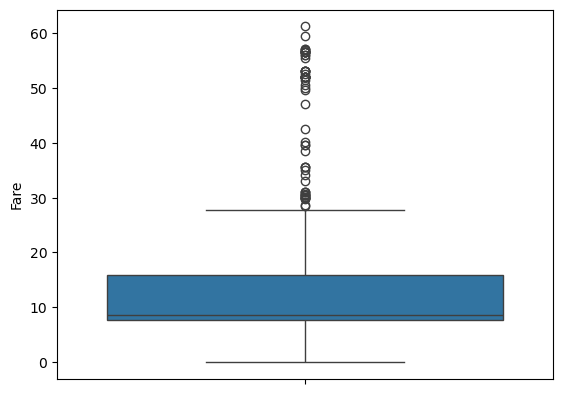

In [17]:
for i in df_train_cleaned._get_numeric_data():
    sns.boxplot(y=df_train_cleaned[i])
    plt.ylabel(i)     
    plt.show()

In [18]:
##EDA on testing dataset

In [19]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [20]:
mode1=df_test["Cabin"].mode()
mode1

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [21]:
mode2=df_test["Embarked"].mode()
mode2

0    S
Name: Embarked, dtype: object

In [22]:
mean1=df_test["Age"].mean().round()
mean1

30.0

In [23]:
mean2=df_test["Fare"].mean().round()
mean2

36.0

In [24]:
df_test.fillna({"Age":mean,"Cabin":mode1[0][1],"Embarked":mode2[0],"Fare":mean2},inplace=True)

In [25]:
df_test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [26]:
df_test.duplicated().any()

False

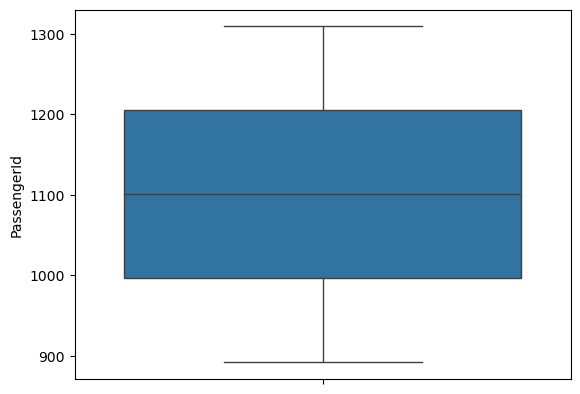

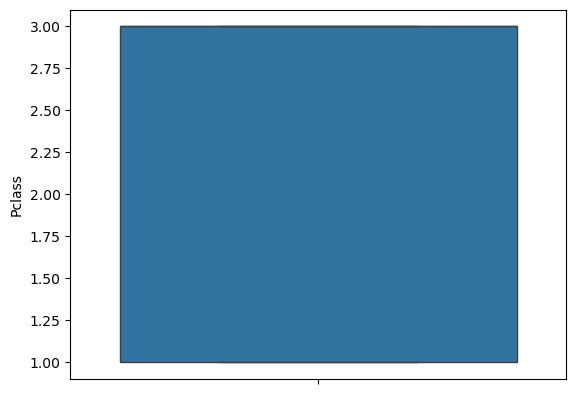

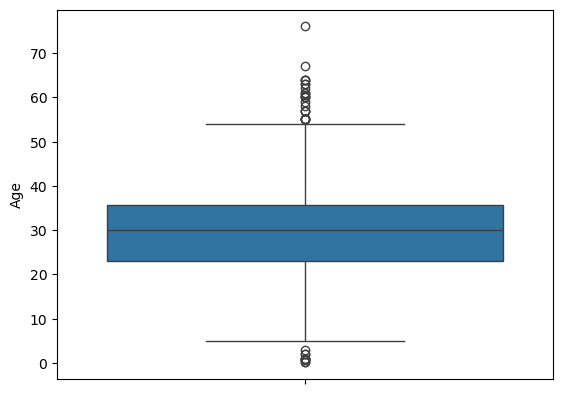

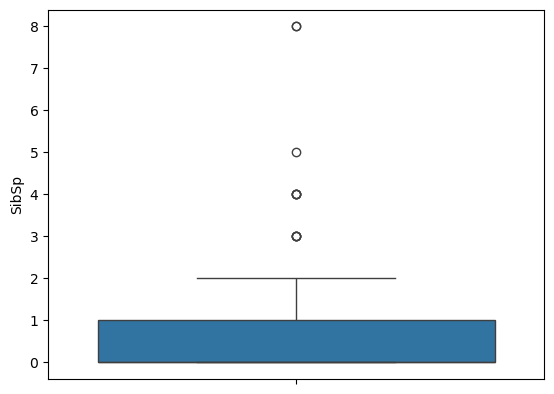

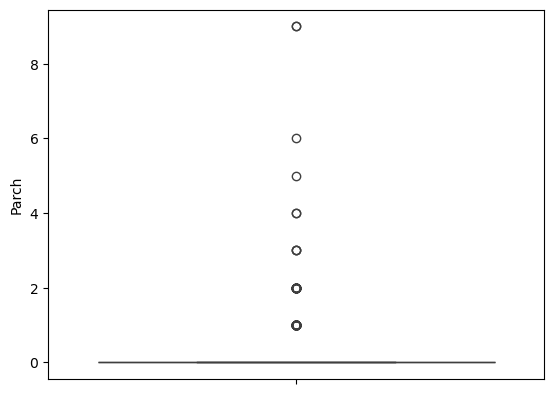

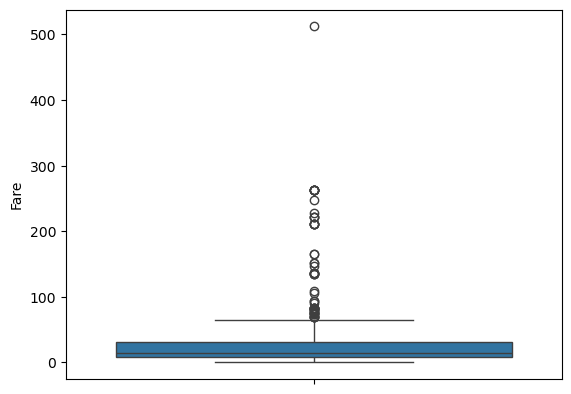

In [27]:
for i in df_test._get_numeric_data():
    sns.boxplot(y=df_test[i])
    plt.ylabel(i)     
    plt.show()

In [28]:
Q1 = df_test.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df_test.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_test.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df_test.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum()) 

Number of outliers in each column:
 PassengerId     0
Pclass          0
Age            36
SibSp          11
Parch          94
Fare           55
dtype: int64


In [29]:
df_test_cleaned = df_test.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df_test_cleaned.reset_index(inplace=True)
df_test_cleaned

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,5,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,5,S
2,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,5,S
3,5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,5,S
4,6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,5,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
276,410,1302,3,"Naughton, Miss. Hannah",female,30.0,0,0,365237,7.7500,5,Q
277,412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,5,S
278,413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,5,S
279,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,5,S


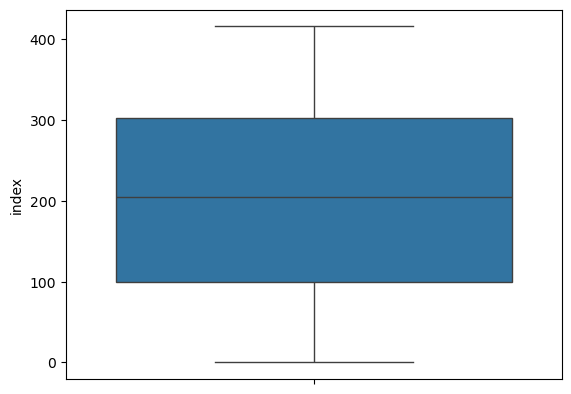

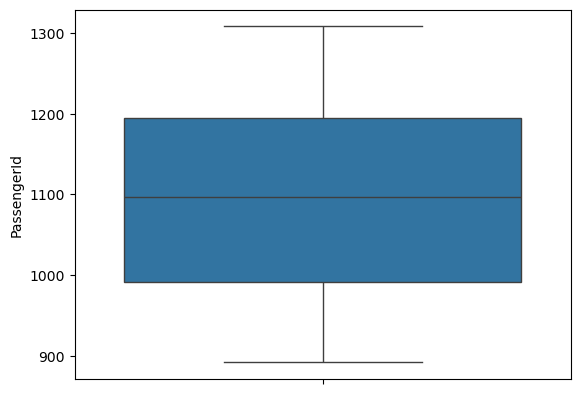

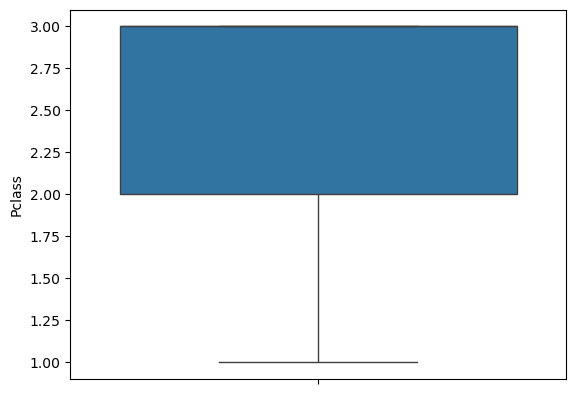

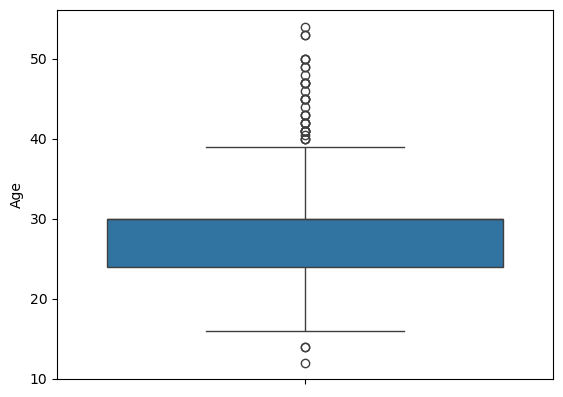

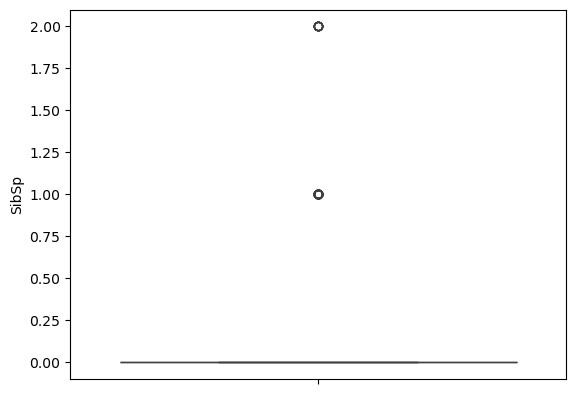

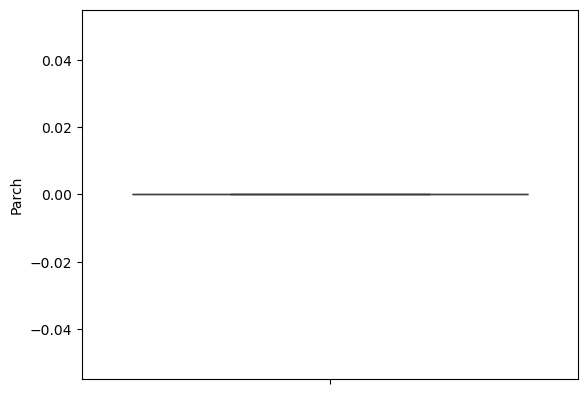

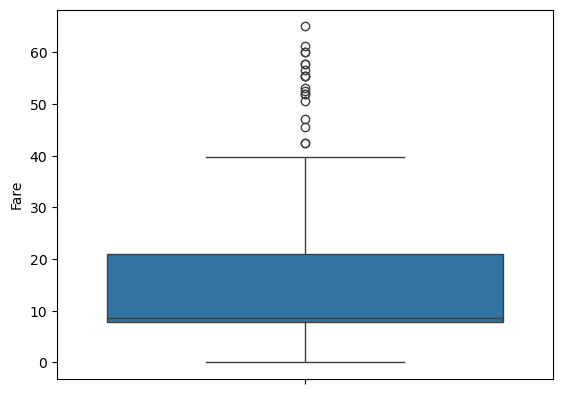

In [30]:
for i in df_test_cleaned._get_numeric_data():
    sns.boxplot(y=df_test_cleaned[i])
    plt.ylabel(i)     
    plt.show()

In [31]:
## Visulization

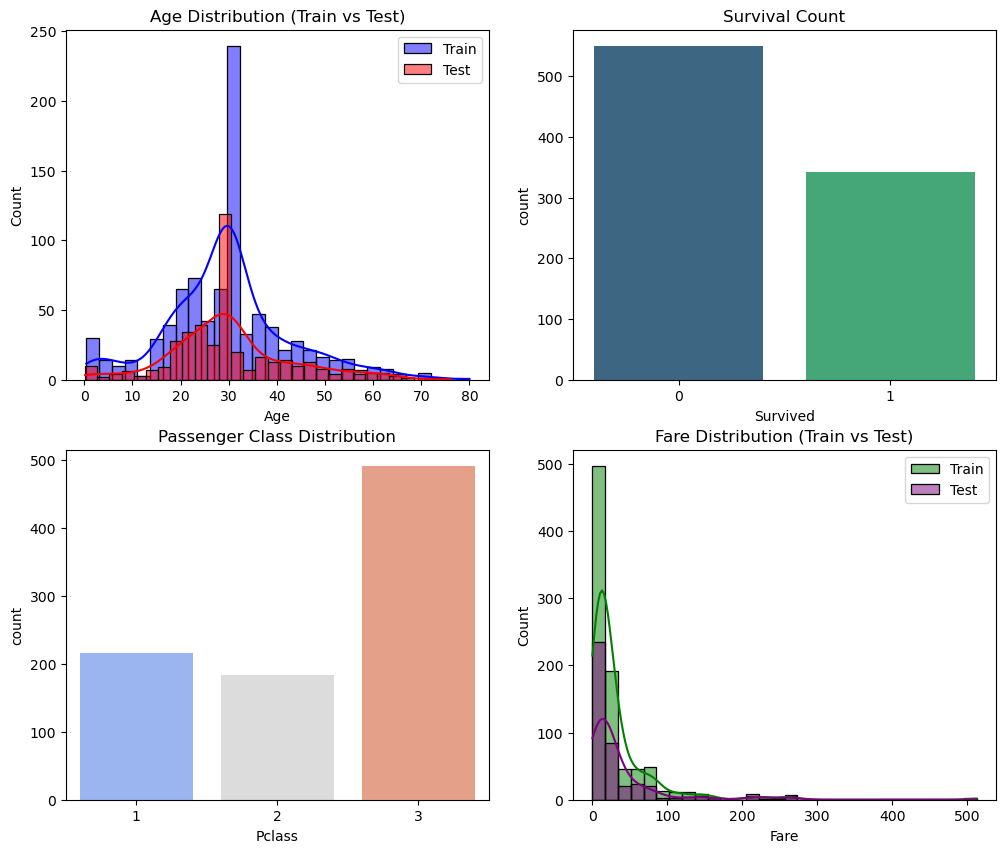

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df_train["Age"].dropna(), bins=30, kde=True, ax=axes[0, 0], color="blue", label="Train")
sns.histplot(df_test["Age"].dropna(), bins=30, kde=True, ax=axes[0, 0], color="red", label="Test")
axes[0, 0].set_title("Age Distribution (Train vs Test)")
axes[0, 0].legend()
sns.countplot(x="Survived", data=df_train, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Survival Count")
sns.countplot(x="Pclass", data=df_train, ax=axes[1, 0], palette="coolwarm")
axes[1, 0].set_title("Passenger Class Distribution")
sns.histplot(df_train["Fare"].dropna(), bins=30, kde=True, ax=axes[1, 1], color="green", label="Train")
sns.histplot(df_test["Fare"].dropna(), bins=30, kde=True, ax=axes[1, 1], color="purple", label="Test")
axes[1, 1].set_title("Fare Distribution (Train vs Test)")
axes[1, 1].legend()

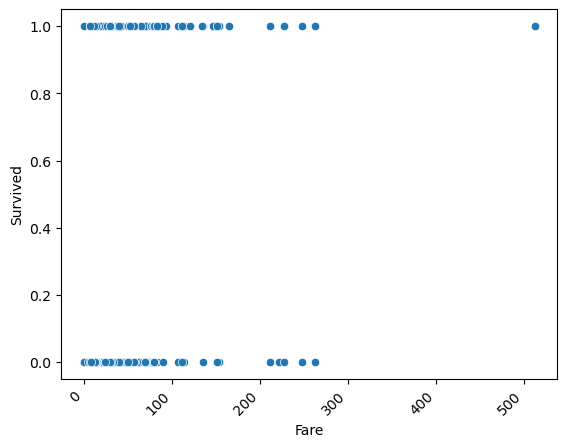

In [33]:
sns.scatterplot(data=df_train,x="Fare",y="Survived")
plt.xticks(rotation=45,ha="right")
plt.show()

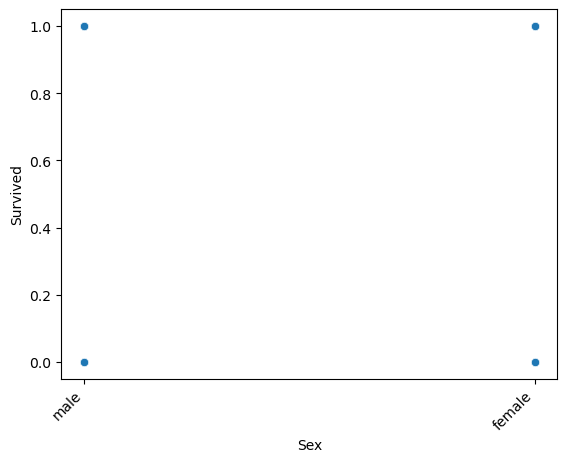

In [34]:
sns.scatterplot(data=df_train,x="Sex",y="Survived")
plt.xticks(rotation=45,ha="right")
plt.show()

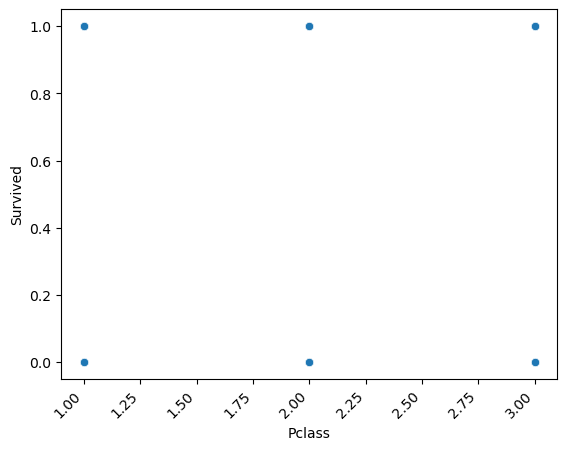

In [35]:
sns.scatterplot(data=df_train,x="Pclass",y="Survived")
plt.xticks(rotation=45,ha="right")
plt.show()

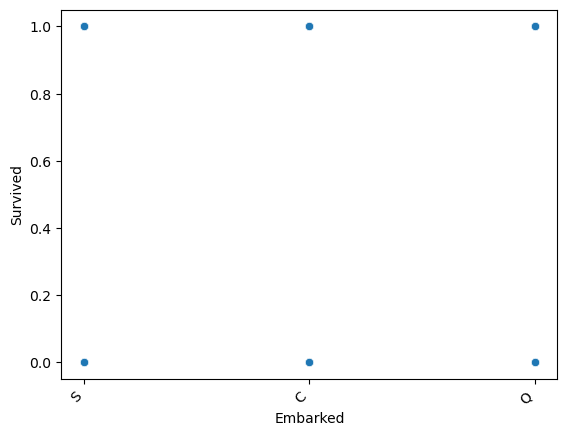

In [36]:
sns.scatterplot(data=df_train,x="Embarked",y="Survived")
plt.xticks(rotation=45,ha="right")
plt.show()

## Encoding

## Label encoding on training dataset


In [39]:
la=LabelEncoder()

In [40]:
df_train["Embarked"]=la.fit_transform(df_train["Embarked"])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G6,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,G6,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,0


In [41]:
df_train["Sex"]=la.fit_transform(df_train["Sex"])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G6,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G6,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,G6,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,G6,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


## Label enconding on testing dataset

In [43]:
df_test["Sex"]=la.fit_transform(df_test["Sex"])

In [44]:
df_test["Embarked"]=la.fit_transform(df_test["Embarked"])
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,5,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,5,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,5,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,5,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,30.0,0,0,A.5. 3236,8.0500,5,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,5,2
416,1308,3,"Ware, Mr. Frederick",1,30.0,0,0,359309,8.0500,5,2


In [45]:
df_train.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)
df_test.drop(columns=["Cabin", "Name", "Ticket", "PassengerId"], inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,30.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [46]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,30.0,0,0,8.0500,2


## Splitting the dataset and model building

In [48]:
x_train=df_train.iloc[:,1:]
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,30.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [49]:
y_train=pd.DataFrame(df_train.iloc[:,0])
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [50]:
## Splitting the data to train,validate

In [51]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,30.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [52]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


## XGBoost

In [54]:
model=xgb.XGBClassifier(random_state=42)

In [55]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
## Finding the y_value using x_val

In [57]:
y_pred=model.predict(x_val)

In [58]:
## Accuracy score based y_predict and y_validate

In [59]:
accuracy_score(y_val,y_pred)

0.7932960893854749

In [60]:
## Finding the y value of test dataset

In [61]:
y_pred1=model.predict(df_test)
y_pred1

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [62]:
print("Accuracy:", accuracy_score(y_val,y_pred))
print("Classification Report:\n", classification_report(y_val,y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val,y_pred))

Accuracy: 0.7932960893854749
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
 [[87 18]
 [19 55]]


## LGBM

In [64]:
model1=lgb.LGBMClassifier(random_state=42)

In [65]:
model1.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [66]:
## Finding the y_value using x_val

In [67]:
y_pred_1=model1.predict(x_val)

In [68]:
## Accuracy score based y_predict and y_validate

In [69]:
accuracy_score(y_val,y_pred_1)

0.8212290502793296

In [70]:
## Finding the y value of test dataset

In [71]:
y_pred_2=model1.predict(df_test)
y_pred_2

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
print("Accuracy:", accuracy_score(y_val,y_pred_1))
print("Classification Report:\n", classification_report(y_val,y_pred_1))
print("Confusion Matrix:\n", confusion_matrix(y_val,y_pred_1))

Accuracy: 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       105
           1       0.78      0.80      0.79        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
 [[88 17]
 [15 59]]


In [73]:
## Crossvalidation on XGBM

In [74]:
kfold=KFold(n_splits=5)

In [75]:
result_xgb=cross_validate(model,x_train,y_train,cv=kfold,scoring=["accuracy","precision"],return_train_score=True)

In [76]:
result_xgb=pd.DataFrame(result_xgb)
result_xgb

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision
0,0.162049,0.035635,0.776224,0.971880,0.750000,0.990000
1,0.154970,0.040083,0.790210,0.973638,0.700000,0.976077
2,0.169954,0.041308,0.809859,0.968421,0.760870,0.985366
3,0.167860,0.040184,0.781690,0.971930,0.740741,0.980296
4,0.156856,0.039922,0.816901,0.968421,0.730769,0.985437


In [77]:
## Cross validation on LGBM

In [78]:
result_lgb=cross_validate(model1,x_train,y_train,cv=kfold,scoring=["accuracy","precision"],return_train_score=True)

[LightGBM] [Info] Number of positive: 212, number of negative: 357
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.372583 -> initscore=-0.521150
[LightGBM] [Info] Start training from score -0.521150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [79]:
result_lgb=pd.DataFrame(result_lgb)
result_lgb

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision
0,0.115695,0.034478,0.804196,0.945518,0.791667,0.964103
1,0.114555,0.021403,0.811189,0.945518,0.745455,0.946341
2,0.123612,0.029295,0.795775,0.935088,0.729167,0.950000
3,0.112228,0.031777,0.823944,0.940351,0.807692,0.963351
4,0.128694,0.033491,0.809859,0.945614,0.734694,0.956098


In [80]:
## Comparison between XGBM and LGBM

In [81]:
proba_xgb=model.predict_proba(x_val)[:,1]
proba_xgb

array([0.01229075, 0.30888897, 0.42272508, 0.9981476 , 0.89057344,
       0.96811175, 0.7842726 , 0.00572888, 0.29364857, 0.9979102 ,
       0.7953404 , 0.17161174, 0.03131221, 0.06971734, 0.20019737,
       0.9982481 , 0.46088058, 0.89239436, 0.15415663, 0.00571222,
       0.00364679, 0.83354527, 0.05598309, 0.02447318, 0.02012388,
       0.00516767, 0.04911256, 0.58815235, 0.14515312, 0.88025457,
       0.01616839, 0.72763455, 0.84927297, 0.5053084 , 0.20986803,
       0.27304092, 0.1524946 , 0.7842726 , 0.995133  , 0.00992457,
       0.0101832 , 0.0584591 , 0.04382242, 0.12141865, 0.01429754,
       0.03391966, 0.09924879, 0.00346316, 0.16477706, 0.37352505,
       0.9864157 , 0.99424946, 0.00113218, 0.6603266 , 0.05389874,
       0.9898134 , 0.393536  , 0.961857  , 0.9966221 , 0.18522975,
       0.40071163, 0.94017005, 0.9774954 , 0.10580262, 0.12141865,
       0.99415624, 0.00768716, 0.50032187, 0.12275823, 0.9978284 ,
       0.9438934 , 0.9861312 , 0.9663454 , 0.99780756, 0.02418

In [82]:
proba_lgb=model1.predict_proba(x_val)[:,1]
proba_lgb

array([0.02857276, 0.31353952, 0.23665929, 0.9987521 , 0.60180175,
       0.9538423 , 0.73057998, 0.00778106, 0.4900261 , 0.99392515,
       0.69443672, 0.14345888, 0.05378106, 0.06409445, 0.16163885,
       0.98725962, 0.60234959, 0.84490792, 0.21740687, 0.00891909,
       0.00674539, 0.83624661, 0.32047678, 0.02838865, 0.01723524,
       0.00476841, 0.18937336, 0.5064988 , 0.1428959 , 0.63555456,
       0.0375122 , 0.62944964, 0.69358098, 0.53342887, 0.19871518,
       0.24800639, 0.19947479, 0.73057998, 0.98501435, 0.00988143,
       0.06671001, 0.08896181, 0.03217313, 0.10721263, 0.17625207,
       0.12342598, 0.32705131, 0.0012551 , 0.3371848 , 0.63561019,
       0.96840009, 0.99233434, 0.0104005 , 0.6887893 , 0.02410854,
       0.98840498, 0.3090229 , 0.8924236 , 0.99162518, 0.49373125,
       0.22785883, 0.9462423 , 0.95970814, 0.11941383, 0.10721263,
       0.99103637, 0.10079014, 0.12188174, 0.15026501, 0.98452834,
       0.88888775, 0.94657224, 0.87065769, 0.99270371, 0.01193

In [83]:
auc_score=roc_auc_score(y_val,proba_xgb)
auc_score1=round(auc_score,2)
auc_score1

0.86

In [84]:
fpr,tpr,thr=roc_curve(y_val,proba_xgb)
print(fpr,tpr,thr)

[0.         0.         0.         0.00952381 0.00952381 0.01904762
 0.01904762 0.02857143 0.02857143 0.02857143 0.02857143 0.03809524
 0.03809524 0.04761905 0.04761905 0.05714286 0.05714286 0.05714286
 0.07619048 0.07619048 0.1047619  0.11428571 0.11428571 0.14285714
 0.14285714 0.17142857 0.17142857 0.18095238 0.18095238 0.21904762
 0.21904762 0.27619048 0.27619048 0.3047619  0.3047619  0.31428571
 0.31428571 0.33333333 0.36190476 0.36190476 0.39047619 0.40952381
 0.41904762 0.41904762 0.46666667 0.48571429 0.53333333 0.53333333
 0.57142857 0.6        0.60952381 0.60952381 0.63809524 0.63809524
 0.6952381  0.6952381  0.74285714 0.74285714 0.74285714 0.79047619
 0.80952381 0.95238095 0.97142857 1.        ] [0.         0.01351351 0.08108108 0.08108108 0.18918919 0.18918919
 0.2972973  0.2972973  0.35135135 0.37837838 0.44594595 0.44594595
 0.52702703 0.52702703 0.59459459 0.59459459 0.62162162 0.63513514
 0.63513514 0.64864865 0.64864865 0.67567568 0.7027027  0.7027027
 0.74324324 0.743

In [85]:
## ROC curve of XGBM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


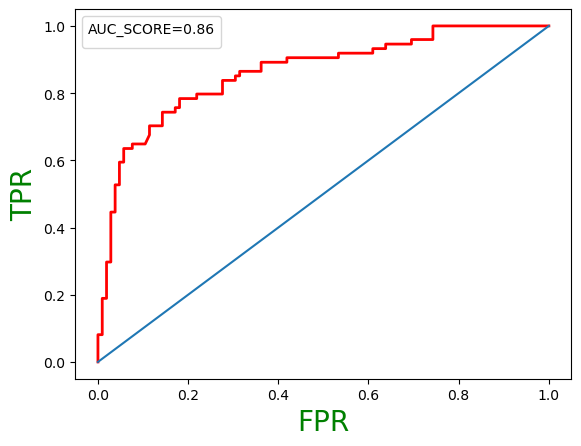

In [86]:
plt.plot(fpr,tpr,color="red",linewidth=2)
plt.legend(title=f"AUC_SCORE={auc_score1}",loc="best")
plt.xlabel("FPR",size=20,color="green")
plt.ylabel("TPR",size=20,color="green")
plt.plot([0,1])

In [87]:
auc_score=roc_auc_score(y_val,proba_lgb)
auc_score2=round(auc_score,2)
auc_score2

0.88

In [88]:
fpr,tpr,thr=roc_curve(y_val,proba_lgb)
print(fpr,tpr,thr)

[0.         0.         0.         0.00952381 0.00952381 0.02857143
 0.02857143 0.02857143 0.02857143 0.03809524 0.03809524 0.04761905
 0.04761905 0.04761905 0.04761905 0.05714286 0.05714286 0.07619048
 0.07619048 0.08571429 0.08571429 0.12380952 0.12380952 0.13333333
 0.13333333 0.16190476 0.16190476 0.19047619 0.19047619 0.23809524
 0.23809524 0.26666667 0.26666667 0.35238095 0.35238095 0.42857143
 0.44761905 0.45714286 0.45714286 0.4952381  0.4952381  0.52380952
 0.58095238 0.6        0.6        0.60952381 0.60952381 0.68571429
 0.71428571 0.72380952 0.72380952 0.76190476 0.76190476 0.86666667
 0.88571429 1.        ] [0.         0.01351351 0.08108108 0.08108108 0.27027027 0.27027027
 0.32432432 0.35135135 0.47297297 0.47297297 0.52702703 0.52702703
 0.55405405 0.58108108 0.63513514 0.66216216 0.67567568 0.67567568
 0.68918919 0.68918919 0.7027027  0.7027027  0.71621622 0.71621622
 0.75675676 0.75675676 0.82432432 0.82432432 0.85135135 0.85135135
 0.86486486 0.86486486 0.87837838 0.87

In [89]:
## ROC curve of LGBM

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


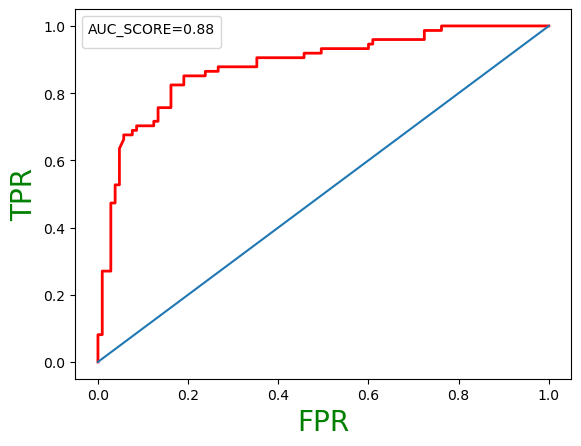

In [90]:
plt.plot(fpr,tpr,color="red",linewidth=2)
plt.legend(title=f"AUC_SCORE={auc_score2}",loc="best")
plt.xlabel("FPR",size=20,color="green")
plt.ylabel("TPR",size=20,color="green")
plt.plot([0,1])

## Conclusion

Based on this dataset LBGM perform much better than XGBM